In [1]:
%matplotlib inline
import psycopg2
import pandas as pd
with psycopg2.connect(host='localhost', user='kite', password='kite', dbname='kite') as conn:
    cur = conn.cursor()
    cur.execute('''

-- Get the centrality of a specific bus.

select centrality from buses where
    reg_num = 'REG_1005' and
    timestamp = (select max(timestamp) from stops)

    ''')
    df = pd.DataFrame(cur.fetchall())
df

,0
0,1063.25


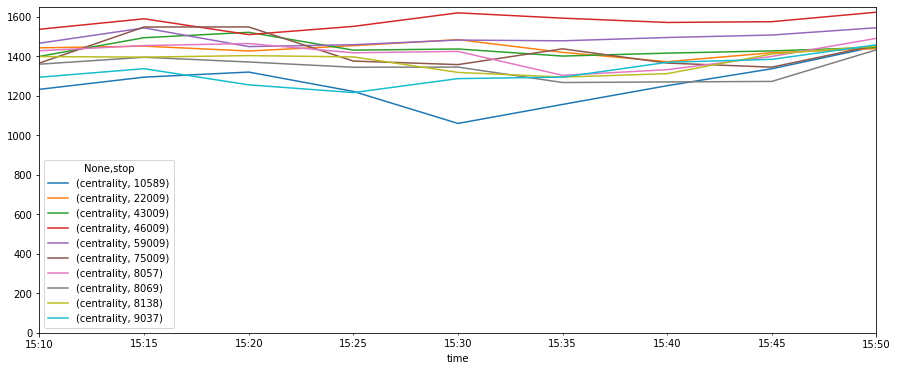

In [2]:
with psycopg2.connect(host='localhost', user='kite', password='kite', dbname='kite') as conn:
    cur = conn.cursor()
    cur.execute('''

-- Plot the centrality over time of the top 10 highest centrality bus stops.

select stop_id, centrality, timestamp from stops
where stop_id in (
    select stop_id from stops
    where timestamp = (select max(timestamp) from stops)
    order by centrality desc
    limit 10)

    ''')
    df = pd.DataFrame(cur.fetchall(), columns=['stop', 'centrality', 'time'])
df.pivot(columns='stop', index='time').plot(figsize=(15, 6), ylim=(0, None))